[   3 |    0]  ELPAC  Norms (sq, s, w) = (     0.01005,    0.009996,   5.462e-05)
[0.0]
[0.125]
[   6 |    8]  ELPAC  Norms (sq, s, w) = (     0.03792,     0.03792,   1.895e-10)
[0.125]
[0.140625]
[   6 |    9]  ELPAC  Norms (sq, s, w) = (      0.1311,       0.131,   7.626e-05)
[0.140625]
[0.15625]
[   5 |    5]  ELPAC  Norms (sq, s, w) = (     0.06269,     0.06269,   6.348e-08)
[0.15625]
[0.1875]
[   4 |    3]  ELPAC  Norms (sq, s, w) = (    0.002875,    0.002875,   3.565e-07)
[0.1875]
[0.25]
[   2 |    1]  ELPAC  Norms (sq, s, w) = (   5.448e-06,    5.14e-06,   3.081e-07)
[0.25]
[0.5]
[   1 |    1]  ELPAC  Norms (sq, s, w) = (   5.936e-17,   5.065e-17,   8.714e-18)
[0.5]
[1.0]
Help on FunctionNode in module vampyr._vampyr.vampyr1d object:

class FunctionNode(MWNode)
 |  Method resolution order:
 |      FunctionNode
 |      MWNode
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initial

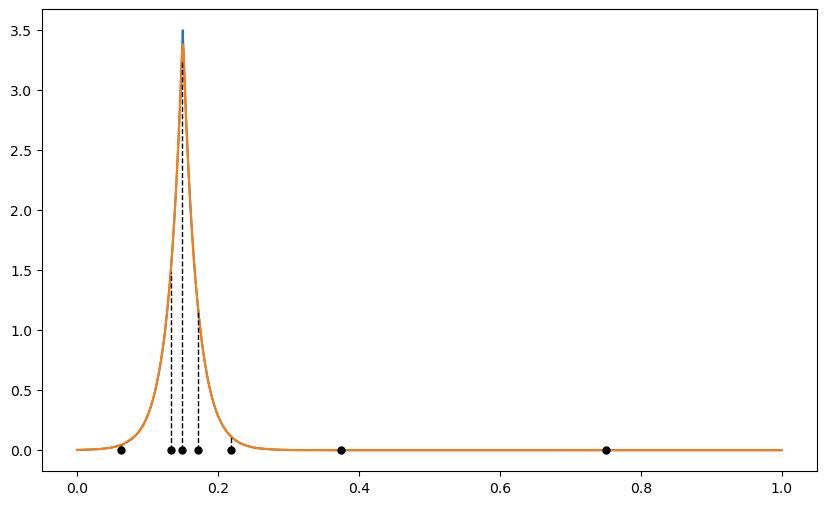

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from vampyr import vampyr1d as vp
import itertools

# Define a function to retrieve the centers of the end nodes of a function tree
def get_center_of_box(function_tree):
    roots = []
    for i in range(function_tree.nEndNodes()):
        roots.append(function_tree.fetchEndNode(i).center())
    return [item for sublist in roots for item in sublist]

# Define a function to plot the function and its function tree along with the quadrature points
def plot_function_and_quadrature(x, function, function_data, function_tree_data, roots, colors, grid):
    plt.figure(figsize=(10,6))  # Create a new figure with specified size
    plt.plot(x, function_data, label="f")
    plt.plot(x, function_tree_data, label="f_tree")

    # Plot quadrature points and lines
    if grid:
        for root, color in zip(roots, itertools.cycle(colors)):
            plt.plot(root, 0, color=color, marker='o', linestyle='None', markersize=5)
            y_val = function([root])
            plt.vlines(root, 0, y_val, color=color, linestyle='dashed', linewidth=1)

# Define a function to set the properties of the plot such as y and x limits, legend etc.
def set_plot_properties(y_lim=(-1.1, 1.1), x_lim=(0, 1)):
    plt.ylim(y_lim)
    plt.xlim(x_lim)
    plt.axhline(0, color='grey', linewidth=0.5)
    plt.legend(fontsize=16)
    plt.show()

# Set up the multi resolution analysis with the specified box and order
MRA = vp.MultiResolutionAnalysis(box=[0, 1], order=3)

# Define the function to be used
def slater_function(x):
    return 3.5*np.exp(- 50.0 * np.abs((x[0] - 0.15)))

# Project the function onto the MRA
P = vp.ScalingProjector(MRA, 2*1.0e-1)
f_proj = P(slater_function)

# Define the colors to be used in the plot
colors = ["black"]

# Get the roots using the function defined above
roots = get_center_of_box(f_proj)

# Define the x-values and calculate the corresponding y-values for the function and its projection
x = np.linspace(0, 0.9999, 10000)
function_data = [slater_function([x]) for x in x]
function_tree_data = [f_proj([x]) for x in x]

# Plot the function and its function tree along with the quadrature points
plot_function_and_quadrature(x, slater_function, function_data, function_tree_data, roots, colors, True)

# Set the properties of the plot
# set_plot_properties(y_lim=(-0.1, 4.0), x_lim=(0, 0.5))

for i in range(f_proj.nEndNodes()):
    print(f_proj.fetchEndNode(i))
    print(f_proj.fetchEndNode(i).lowerBounds())
    print(f_proj.fetchEndNode(i).upperBounds())
help(f_proj.fetchEndNode(0))